In [40]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud 
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [32]:
Consumer_Key = "8gkozHxDwmXsvgLvqXMBWcx9T"
Consumer_Secret_Key = "ycxz3P69xHVYUNY6ViqvYVxAuahB886yLSF4qTxCJ46NnR8tIH"
Access_Token = "1331481154189361153-S55qEPfYnPzwLIMFLUonKFt9Z9H3hX"
Access_Token_Secret = "i3S0tbdBqBSxtC32UVGZt8VGjFMlFwDUvkeUkEVfiSrfS"

In [33]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [72]:
posts = api.user_timeline(screen_name="Bawaslu", count = 100, lang ="en", tweet_mode="extended")

# Print 5 tweet
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
  print(str(i) +') '+ tweet.full_text + '\n')
  i= i+1

Show the 5 recent tweets:

1) Badan Pengawas Pemilu menerima hasil laporan terkait proses Pemungutan dan  Perhitungan Surat Suara dan Pemilihan... http://t.co/a0RRWK4e8L

2) Bawaslu Berkomunikasi dengan Pengawas Pemilu Luar Negeri melalui Aplikasi Online

klik untuk membaca lebih lanjut... http://t.co/vgH5Jt0LpU

3) Dukung Pengawasan Pemilu, Tiga Organisasi Teken MoU dengan Bawaslu. 
klik untuk membaca lebih lanjut :... http://t.co/YlquWTstFW

4) Ayooo... !! Bantu dukung gerakan Sejuta Relawan Pengawas Pemilu !!! http://t.co/1Oxk6AI4C9 follow twitter kami... http://t.co/zrartRzGfT

5) http://t.co/pBf4CDFJlj



In [73]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,Badan Pengawas Pemilu menerima hasil laporan t...
1,Bawaslu Berkomunikasi dengan Pengawas Pemilu L...
2,"Dukung Pengawasan Pemilu, Tiga Organisasi Teke..."
3,Ayooo... !! Bantu dukung gerakan Sejuta Relawa...
4,http://t.co/pBf4CDFJlj


In [79]:
def cleanTxt(text):
  text = re.sub('@[A-Za-z0-9]+', '', text) #Removinf @mentions
  text = re.sub('#', '', text) #Removinf '#' Hash tag
  text = re.sub('RT[\s]+', '', text) #Removing RT
  text = re.sub('https?:\/\/\S+', '', text) #Removing hyperlink

  return text

  # Clean the tweets
  df['Tweets'] = df['Tweets'].apply(cleanTxt)

  # Show the cleaned tweets
  df

In [80]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)


# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity,Analysis
0,Badan Pengawas Pemilu menerima hasil laporan t...,0.0,0.0,Netral
1,Bawaslu Berkomunikasi dengan Pengawas Pemilu L...,0.0,0.0,Netral
2,"Dukung Pengawasan Pemilu, Tiga Organisasi Teke...",0.0,0.0,Netral
3,Ayooo... !! Bantu dukung gerakan Sejuta Relawa...,0.0,0.0,Netral
4,http://t.co/pBf4CDFJlj,0.0,0.0,Netral
...,...,...,...,...
95,12| dengan gugatan sejumlah LSM terhadap mater...,0.0,0.0,Netral
96,"11| Seleksi Anggota KPU-Bawaslu, menyatakan ba...",0.0,0.0,Netral
97,10| kepentingan. Bekas anggota parpol yang ind...,0.0,0.0,Netral
98,"9| bisa juga independen. Tapi, mana ada yang n...",0.0,0.0,Netral


<function matplotlib.pyplot.show>

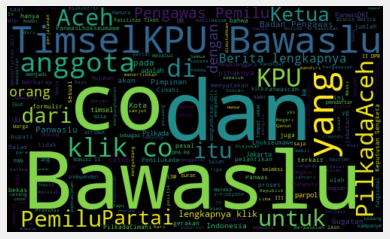

In [81]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=10, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show

In [82]:
#Create a function to compute negative (-1), netral (0) and positive (+1) analysis
def getAnalysis(score):

  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Netral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
#Show the dataframe
df      

,Tweets,Subjectivity,Polarity,Analysis
0,Badan Pengawas Pemilu menerima hasil laporan t...,0.0,0.0,Netral
1,Bawaslu Berkomunikasi dengan Pengawas Pemilu L...,0.0,0.0,Netral
2,"Dukung Pengawasan Pemilu, Tiga Organisasi Teke...",0.0,0.0,Netral
3,Ayooo... !! Bantu dukung gerakan Sejuta Relawa...,0.0,0.0,Netral
4,http://t.co/pBf4CDFJlj,0.0,0.0,Netral
...,...,...,...,...
95,12| dengan gugatan sejumlah LSM terhadap mater...,0.0,0.0,Netral
96,"11| Seleksi Anggota KPU-Bawaslu, menyatakan ba...",0.0,0.0,Netral
97,10| kepentingan. Bekas anggota parpol yang ind...,0.0,0.0,Netral
98,"9| bisa juga independen. Tapi, mana ada yang n...",0.0,0.0,Netral


In [87]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:



In [85]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) Dik Doank: Seni Merangsang Mental Bangsa Pencipta http://t.co/K2LmHw6P



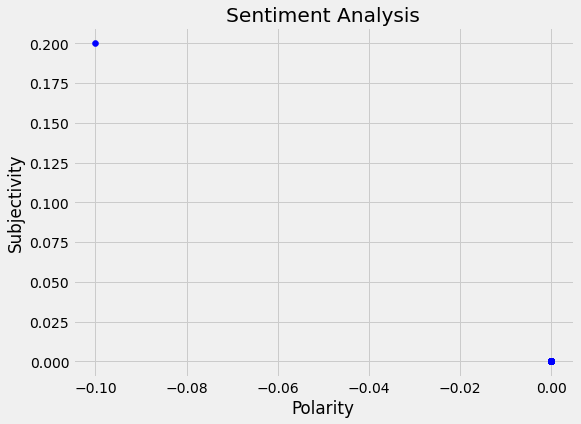

In [88]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [89]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

0.0

In [90]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

1.0

In [91]:
# Show the value counts
df['Analysis'].value_counts()

Netral      99
Negative     1
Name: Analysis, dtype: int64

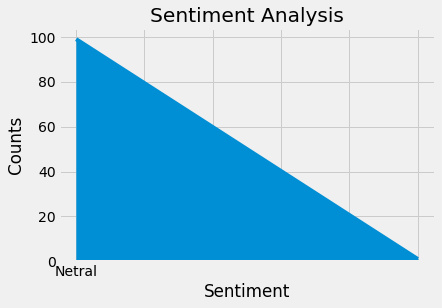

In [92]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'area')
plt.show()

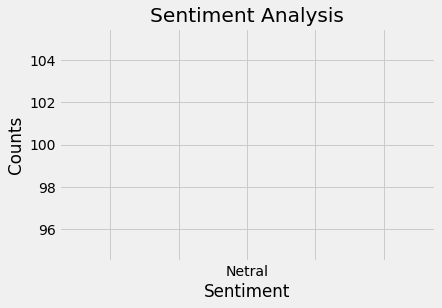

In [53]:

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'line')
plt.show()